# Customer_Case_Study_Modeling

In [111]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
import math
pd.options.display.max_rows = 50

In [5]:
#Import dataframe
insurance_df = pd.read_csv("data/file5_cleanded.csv").drop(['Unnamed: 0'], axis =1)

In [7]:
insurance_df = insurance_df.drop("customer", axis = 1)

In [8]:
insurance_df

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,feburary
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,january
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,feburary
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,january
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,january
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,january
10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,january
10907,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,feburary
10908,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,feburary


#### Cleaning

In [65]:
# Replacing nan values with mean:
mean_months_since_last_claim = np.mean(insurance_df['months since last claim'])
insurance_df['months since last claim'] = insurance_df['months since last claim'].fillna(mean_months_since_last_claim)

In [66]:
mean_number_complains = np.mean(insurance_df['number of open complaints'])
insurance_df['number of open complaints'] = insurance_df['number of open complaints'].fillna(mean_number_complains)

In [127]:
#Calculating the mean without the zeros of a column
round(insurance_df[insurance_df["income"]!=0]["income"].mean(),3)

50414.978

In [130]:
#Replace the zero values with the mean
insurance_df["income"].replace({0: 50414.978}, inplace=True)

In [131]:
insurance_df.describe

<bound method NDFrame.describe of             state  customer lifetime value response  coverage education  \
0         Arizona              4809.216960       No     Basic   College   
1      California              2228.525238       No     Basic   College   
2      Washington             14947.917300       No     Basic  Bachelor   
3          Oregon             22332.439460      Yes  Extended   College   
4          Oregon              9025.067525       No   Premium  Bachelor   
...           ...                      ...      ...       ...       ...   
10905      Nevada             15563.369440       No   Premium  Bachelor   
10906      Oregon              5259.444853       No     Basic   College   
10907     Arizona             23893.304100       No  Extended  Bachelor   
10908  California             11971.977650       No   Premium   College   
10909         NaN              6857.519928      NaN     Basic  Bachelor   

      effective to date employmentstatus gender     income locati

In [67]:
# Show the head
print(insurance_df.head())

        state  customer lifetime value response  coverage education  \
0     Arizona              4809.216960       No     Basic   College   
1  California              2228.525238       No     Basic   College   
2  Washington             14947.917300       No     Basic  Bachelor   
3      Oregon             22332.439460      Yes  Extended   College   
4      Oregon              9025.067525       No   Premium  Bachelor   

  effective to date employmentstatus gender  income location code  ...  \
0           2/18/11         Employed      M   48029      Suburban  ...   
1           1/18/11       Unemployed      F       0      Suburban  ...   
2           2/10/11         Employed      M   22139      Suburban  ...   
3           1/11/11         Employed      M   49078      Suburban  ...   
4           1/17/11    Medical Leave      F   23675      Suburban  ...   

  number of policies     policy type        policy  renew offer type  \
0                  9  Corporate Auto  Corporate L3      

In [132]:
# Get the numerical data
numerical = insurance_df._get_numeric_data()

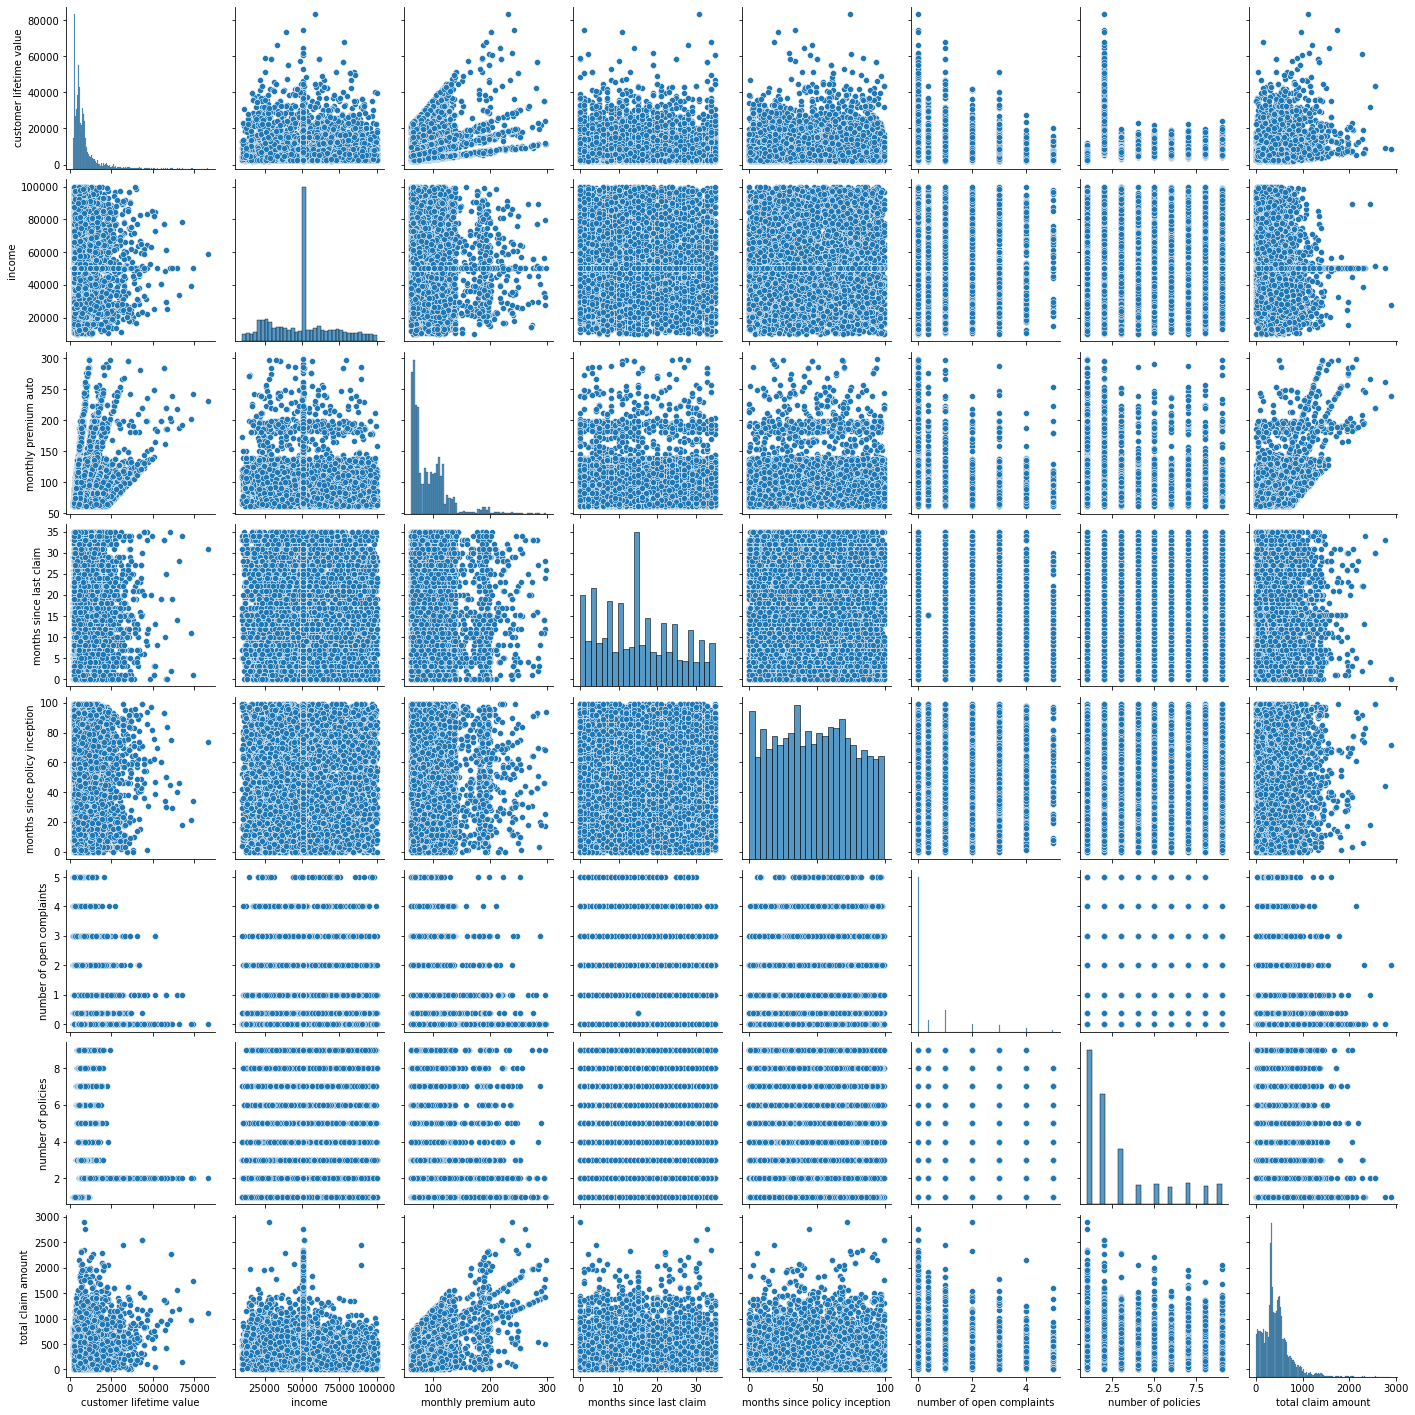

In [133]:
# Plot the numerical data to check for correlation
sns.pairplot(numerical)

#### Normalization of numerical columns

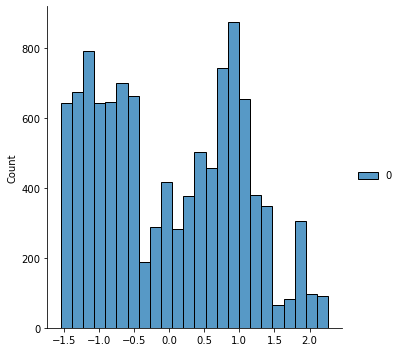

In [134]:
# PowerTransformer()

pt = PowerTransformer()
monthly_premium_auto_transformed=pt.fit_transform(insurance_df['monthly premium auto'].to_numpy().reshape(-1,1))
sns.displot(monthly_premium_auto_transformed)

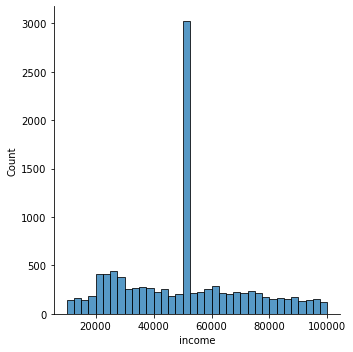

In [135]:
#Quantile Transformer
numerical['income']=numerical['income'].replace(0,np.nan)
qt = QuantileTransformer(output_distribution='normal')
nomalized_income = qt.fit_transform(insurance_df['income'].to_numpy().reshape(-1,1))
sns.displot(numerical["income"])

#### Hot coding categorical values

In [136]:
# select columns with datatype 'object' and assign them to the variable categorical_features
categoricals_features = insurance_df.select_dtypes("object")
categoricals_features

,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,month
0,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN,feburary
1,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN,january
2,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,feburary
3,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,january
4,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN,january
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A,january
10906,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,january
10907,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN,feburary
10908,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A,feburary


In [137]:
categorical_cols=pd.get_dummies(categoricals_features)

In [138]:
categorical_cols

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small,vehicle type_A,month_feburary,month_january
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
10906,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
10908,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,1,0


### Predictive Modeling

#### X Y split

In [139]:
X = insurance_df.drop('total claim amount', axis=1)
y = insurance_df['total claim amount']

In [140]:
X = X._get_numeric_data()
X

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,4809.216960,48029.000,61,7.000000,52,0.000000,9
1,2228.525238,50414.978,64,3.000000,26,0.000000,1
2,14947.917300,22139.000,100,34.000000,31,0.000000,2
3,22332.439460,49078.000,97,10.000000,3,0.000000,2
4,9025.067525,23675.000,117,15.149071,31,0.384256,7
...,...,...,...,...,...,...,...
10905,15563.369440,50414.978,253,15.149071,40,0.384256,7
10906,5259.444853,61146.000,65,7.000000,68,0.000000,6
10907,23893.304100,39837.000,201,11.000000,63,0.000000,2
10908,11971.977650,64195.000,158,0.000000,27,4.000000,6


array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly premium auto'}>],
       [<AxesSubplot:title={'center':'months since last claim'}>,
        <AxesSubplot:title={'center':'months since policy inception'}>,
        <AxesSubplot:title={'center':'number of open complaints'}>],
       [<AxesSubplot:title={'center':'number of policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

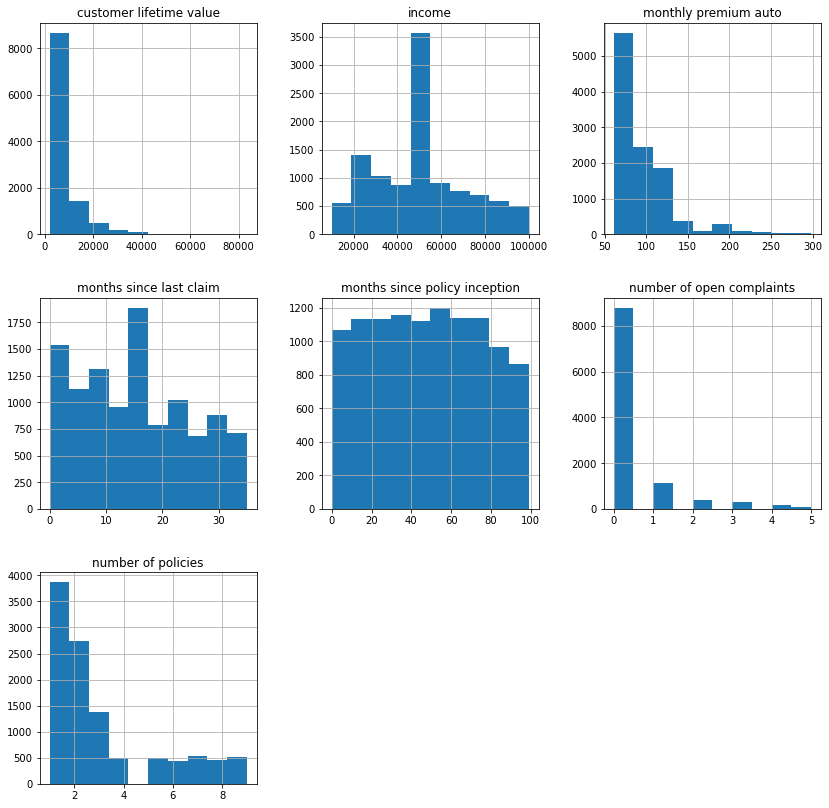

In [141]:
# Show the histograms of the independent variables
X.hist(figsize=(14,14))

### Linear Regression

#### 1. Data Splitting

In [142]:
# Split the data into a train and test set, to use the test set later for the validation of the model
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

#### 2. Standardize

In [143]:
# fit() calculates the best parameters for the model
std_scaler=StandardScaler().fit(X_train)
X_train_scaled=std_scaler.transform(X_train)

In [144]:
# transform() method  on the test data
X_test_scaled=std_scaler.transform(X_test)

In [145]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-6.70129508e-01 -8.50078307e-01 -1.77408046e-01 ... -1.01395735e-02
  -4.35148034e-01 -8.23324989e-01]
 [ 3.04436074e+00 -7.18525577e-01  4.22263292e+00 ... -1.00885254e+00
  -4.35148034e-01 -4.08347894e-01]
 [-7.21338256e-02  2.21652770e+00  5.41730577e-02 ... -1.11585750e+00
   7.04866605e-01  1.25156048e+00]
 ...
 [ 9.78796193e-01  3.51845728e-03  1.32786913e+00 ...  2.75206987e-01
  -4.35148034e-01 -4.08347894e-01]
 [ 5.21054160e+00 -1.30872860e+00  1.12523566e+00 ...  8.10231789e-01
   2.90955171e-03 -4.08347894e-01]
 [-8.01183967e-01  1.27255971e+00 -8.43203718e-01 ...  7.03226828e-01
  -4.35148034e-01 -8.23324989e-01]]
--------
[[-0.82006016  0.00351846 -0.61162261 ... -1.57954566 -0.43514803
  -0.82332499]
 [-0.28953319 -1.44409096 -0.49583206 ...  0.41788027  0.7048666
   0.4216063 ]
 [-0.38514774  1.00516239 -0.7563608  ... -1.22286246 -0.43514803
   1.25156048]
 ...
 [-0.74223931  1.45865281 -0.55372734 ... -1.61521398 -0.43514803
  -0.82332499]
 [ 0.63136522 -0.67579987  

In [146]:
numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029.000,61,7.000000,52,0.000000,9,292.800000
1,2228.525238,50414.978,64,3.000000,26,0.000000,1,744.924331
2,14947.917300,22139.000,100,34.000000,31,0.000000,2,480.000000
3,22332.439460,49078.000,97,10.000000,3,0.000000,2,484.013411
4,9025.067525,23675.000,117,15.149071,31,0.384256,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,50414.978,253,15.149071,40,0.384256,7,1214.400000
10906,5259.444853,61146.000,65,7.000000,68,0.000000,6,273.018929
10907,23893.304100,39837.000,201,11.000000,63,0.000000,2,381.306996
10908,11971.977650,64195.000,158,0.000000,27,4.000000,6,618.288849


#### 3. Applying linear regression

In [147]:
# Modeling using scikit learn
# Model fitting
model=LinearRegression()

In [148]:
# Model train
model.fit(X_train_scaled, y_train)

LinearRegression()

In [149]:
#Get model parameters for coeffient
model.coef_

array([ -7.43209714, -45.01798251, 186.22967894,   3.2463038 ,
        -4.98769948,  -1.24120027,   0.64354577])

In [151]:
model.intercept_

434.1323053463402

#### 4. Model Interpretation

In [152]:
# Making prediction, using the X_test_scaled
y_pred=model.predict(X_test_scaled)   

In [153]:
y_test

1183     518.400000
2111     364.800000
7971      29.984815
7189     166.937747
3103     556.800000
           ...     
5104     350.400000
1632     934.656068
9488      97.928632
1303     388.148089
2226    1176.285998
Name: total claim amount, Length: 3273, dtype: float64

#### Estimated value

In [154]:
y_pred

array([337.3657952 , 406.25867328, 256.9953291 , ..., 282.57192283,
       796.07466708, 619.94261566])

#### Plot the y_test and y_pred in the following three plots

In [156]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

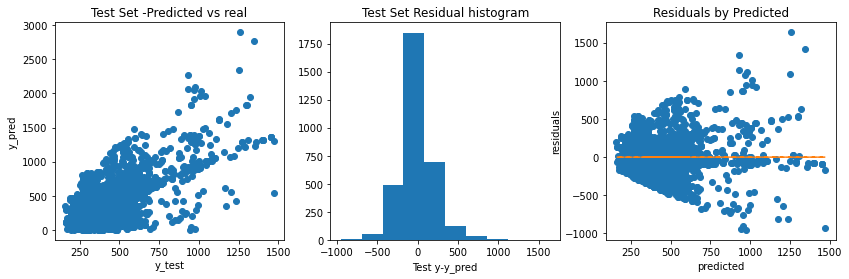

In [157]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

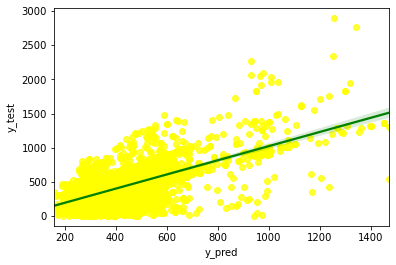

In [158]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "yellow"}, line_kws={"color": "green"})

### Model Validation

#### MSE - Mean Squared Error

In [161]:
print(mse(y_test,y_pred))
mse = mse(y_test,y_pred)

TypeError: 'numpy.float64' object is not callable

#### RMSE - Root Mean Squared Error

In [163]:
rmse = math.sqrt(mse)
rmse

201.14663485632394

#### MAE - Mean Absolute Error

In [164]:
print(mae(y_test,y_pred))

150.43549517423688
